# Chapter 10

## Question 10

PCA and K-means clustering on simulated data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.decomposition
import sklearn.cluster

### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [2]:
class_one = np.random.multivariate_normal([0]*50, cov=np.eye(50), size=20)  # distribution centered on [0,0,0, ...] 
class_two = np.random.multivariate_normal([1]*50, cov=np.eye(50), size=20) 
class_three = np.random.multivariate_normal([2]*50, cov=np.eye(50), size=20)
dataset = np.vstack([class_one, class_two, class_three])

### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes.

In [3]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(dataset)
projected_dataset = pca.transform(dataset)
y = np.asarray([0]*20 + [1]*20 + [2]*20)

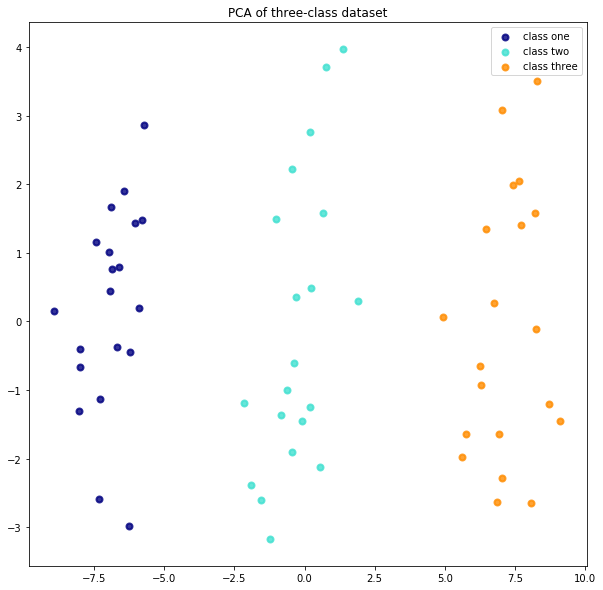

In [4]:
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = ["class one", "class two", "class three"]

fig, ax = plt.subplots(figsize=(10,10))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(projected_dataset[y == i, 0], projected_dataset[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of three-class dataset')
plt.show()

### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

[[20  0  0]
 [ 0  0 20]
 [ 0 20  0]]


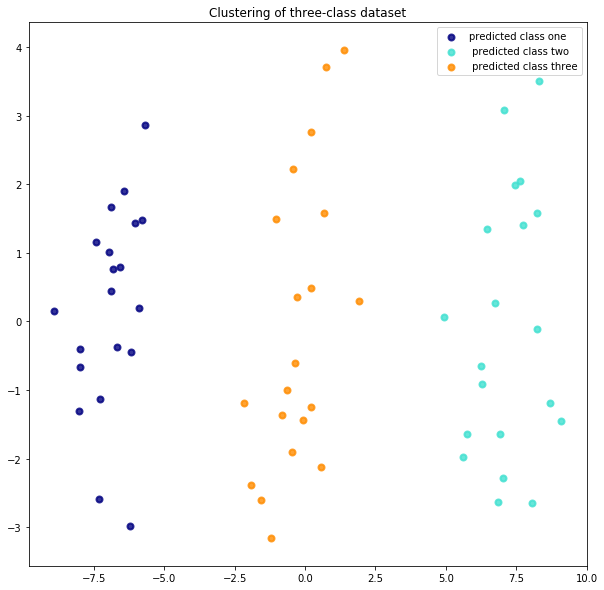

In [5]:
kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(dataset)
predicted_labels = kmeans.labels_
print(sklearn.metrics.confusion_matrix(predicted_labels, y))

def plotClustering(projected_dataset, target_names, colors, labels):

    lw = 2

    fig, ax = plt.subplots(figsize=(10,10))
    for color, i, target_name in zip(colors, range(len(set(labels))), target_names):
        ax.scatter(projected_dataset[labels == i, 0], projected_dataset[labels == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('Clustering of three-class dataset')
    plt.show()

colors = ['navy', 'turquoise', 'darkorange']
target_names = ["predicted class one", " predicted class two", " predicted class three"]
plotClustering(projected_dataset, target_names, colors, predicted_labels)


### (d) Perform K-means clustering with K = 2. Describe your results.

[[ 0  1 20]
 [20 19  0]
 [ 0  0  0]]


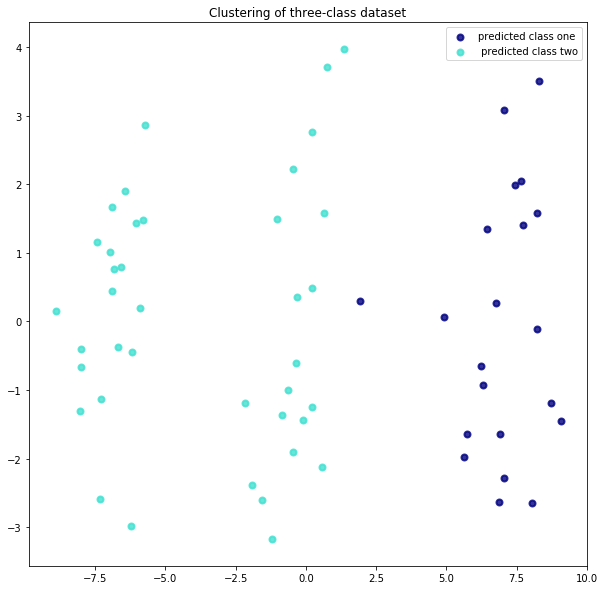

In [6]:
K = 2
kmeans = sklearn.cluster.KMeans(n_clusters=K).fit(dataset)
predicted_labels = kmeans.labels_
print(sklearn.metrics.confusion_matrix(predicted_labels, y))

colors = ['navy', 'turquoise', 'darkorange']
target_names = ["predicted class one", " predicted class two", " predicted class three"]
plotClustering(projected_dataset, target_names, colors, predicted_labels)


### (e) Now perform K-means clustering with K = 4, and describe your results.

[[ 0  7  0  0]
 [ 0 13  0  0]
 [20  0  0  0]
 [ 0  0 20  0]]


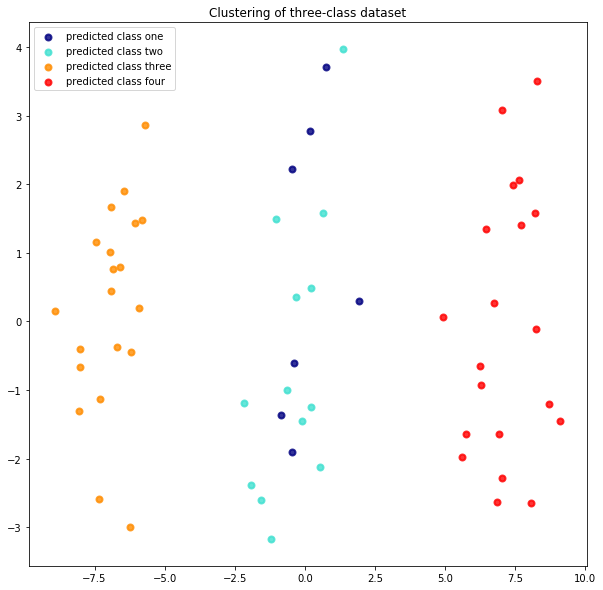

In [7]:
K = 4
kmeans = sklearn.cluster.KMeans(n_clusters=K).fit(dataset)
predicted_labels = kmeans.labels_
print(sklearn.metrics.confusion_matrix(predicted_labels, y))

colors = ['navy', 'turquoise', 'darkorange', 'red']
target_names = ["predicted class one", "predicted class two", "predicted class three", "predicted class four"]
plotClustering(projected_dataset, target_names, colors, predicted_labels)


### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of  which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

[[ 0  0 20]
 [20  0  0]
 [ 0 20  0]]


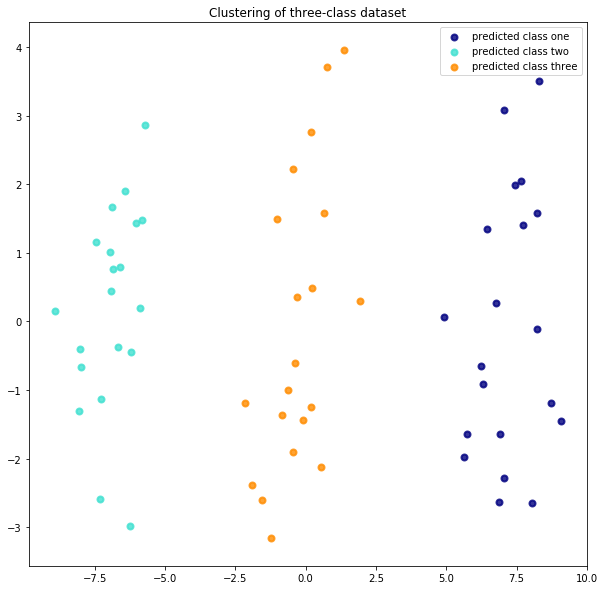

In [8]:
K = 3
kmeans = sklearn.cluster.KMeans(n_clusters=K).fit(projected_dataset)
predicted_labels = kmeans.labels_
print(sklearn.metrics.confusion_matrix(predicted_labels, y))

colors = ['navy', 'turquoise', 'darkorange', 'red']
target_names = ["predicted class one", "predicted class two", "predicted class three", "predicted class four"]
plotClustering(projected_dataset, target_names, colors, predicted_labels)


Works just fine!

### (g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

[[20  0  0]
 [ 0  0 20]
 [ 0 20  0]]


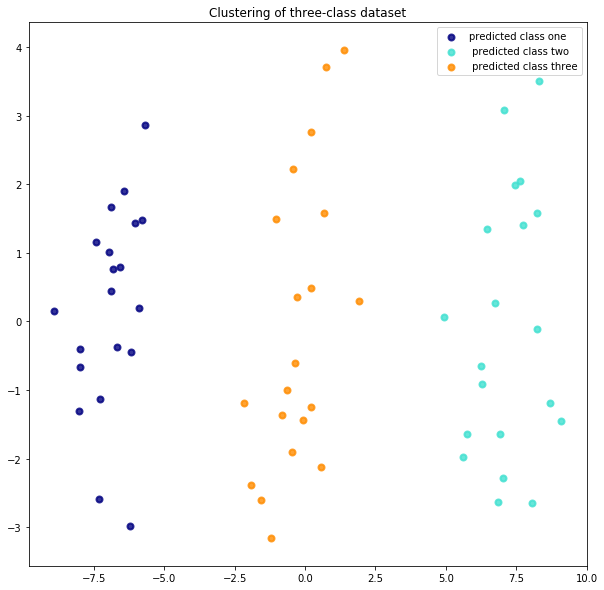

In [11]:
K = 3
kmeans = sklearn.cluster.KMeans(n_clusters=K).fit(sklearn.preprocessing.StandardScaler(with_mean=False).fit_transform(dataset))
predicted_labels = kmeans.labels_
print(sklearn.metrics.confusion_matrix(predicted_labels, y))

colors = ['navy', 'turquoise', 'darkorange']
target_names = ["predicted class one", " predicted class two", " predicted class three"]
plotClustering(projected_dataset, target_names, colors, predicted_labels)


It's equivalent, as the data already had unit standard deviation.